# Исследование молочного хозяйства «Вольный луг». 

## 1 Шаг. Загрузка и изучение данных

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_squared_error,
    mean_absolute_error
)

### 1.1. Общая информация о данных

In [10]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')
except:
    ferma_main = pd.read_csv('C:/Users/Kseno/Downloads/ferma_main.csv', sep=';', decimal = ',')

In [11]:
ferma_main.head() # Первые 5 строк датафрейма

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

In [12]:
ferma_main.describe() # Общая информация о количественных признаках

id      Удой, кг  ЭКЕ (Энергетическая кормовая единица)  \
count  634.000000    634.000000                             634.000000   
mean   317.460568   6187.025237                              14.542744   
std    183.096982   1638.401021                               1.301301   
min      1.000000   5204.000000                              10.900000   
25%    159.250000   5751.750000                              13.500000   
50%    317.500000   6130.500000                              14.700000   
75%    475.750000   6501.000000                              15.600000   
max    629.000000  45616.000000                              16.800000   

       Сырой протеин, г  СПО (Сахаро-протеиновое соотношение)  Жирность,%  \
count        634.000000                            634.000000  634.000000   
mean        1922.682965                              0.912855    3.603943   
std          182.392548                              0.032209    0.168020   
min         1660.000000                              0.840000    2.990000   
25%         1772.250000                              0.890000    3.590000   
50%         1880.500000                              0.930000    3.650000   
75%         2058.750000                              0.940000    3.720000   
max         2349.000000                              0.960000    3.750000   

          Белок,%  
count  634.000000  
mean     3.075666  
std      0.002540  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000

In [13]:
ferma_main.describe(include='object') # Общая информация о категориальных признаках

Порода Тип пастбища порода папы_быка Вкус молока      Возраст
count              634          634              634         634          634
unique               2            3                3           2            2
top     Вис Бик Айдиал    Холмистое          Соверин      вкусно  более_2_лет
freq               373          356              316         371          524

In [14]:
ferma_main.info() # Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

* в датафрейме `ferma_main` содержится 634 строки и 12 столбцов;
* названия столбцов нужно привести к стандартному;
* в некоторых столбцах необходимо поменять тип данных;
* пропусков в данных нет.

In [16]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')
except:
    ferma_dad = pd.read_csv('C:/Users/Kseno/Downloads/ferma_dad.csv', sep=';', decimal = ',')

In [17]:
ferma_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [18]:
ferma_dad.describe()

id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000

In [19]:
ferma_dad.describe(include='object')

Имя Папы
count       629
unique        4
top       Барин
freq        240

In [20]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


* в датафрейме `ferma_dad` содержится 629 строк и 2 столбца;
* название столбца "Имя Папы" нужно привести к стандартному;
* данные имеют корректный тип;
* пропусков в данных нет.

In [22]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')
except:
    cow_buy = pd.read_csv('C:/Users/Kseno/Downloads/cow_buy.csv', sep=';', decimal = ',')

In [23]:
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [24]:
cow_buy.describe()

Текущая_жирность,%  Текущий_уровень_белок,%
count           20.000000                20.000000
mean             3.577500                 3.069500
std              0.126818                 0.010339
min              3.340000                 3.046000
25%              3.510000                 3.064000
50%              3.590000                 3.074000
75%              3.650000                 3.076000
max              3.770000                 3.081000

In [25]:
cow_buy.describe(include='object')

Порода Тип пастбища порода папы_быка Имя_папы      Возраст
count                20           20               20       20           20
unique                2            2                2        4            2
top     РефлешнСоверинг    равнинное          Соверин   Буйный  более_2_лет
freq                 11           11               12        8           15

In [26]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


* в датафрейме `cow_buy` содержится 20 строк и 7 столбцов;
* названия столбцов нужно привести к стандартному;
* данные в нескольких столбцах имеют некорректный тип;
* пропусков в данных нет.

### 1.2. Переименование столбцов
Приведу названия столбцов к верблюжьему регистру, а так же уберу лишние единицы измерения и расшифровку, так как эти данные содержатся в описании.

In [29]:
# Привожу названия к верблюжьему регистру
ferma_main = ferma_main.rename(
    columns={
        'Удой, кг': 'Удой',
        'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ',
        'Сырой протеин, г': 'Сырой_протеин',
        'СПО (Сахаро-протеиновое соотношение)': 'СПО',
        'Тип пастбища': 'Тип_пастбища',
        'порода папы_быка': 'порода_папы_быка',
        'Жирность,%': 'Жирность',
        'Белок,%': 'Белок',
        'Вкус молока': 'Вкус_молока'
    }
)

In [30]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'Имя_Папы'})

In [31]:
cow_buy = cow_buy.rename(
    columns={
        'Тип пастбища': 'Тип_пастбища',
        'порода папы_быка': 'порода_папы_быка',
        'Текущая_жирность,%': 'жирность',
        'Текущий_уровень_белок,%': 'белок'
    }
)

In [32]:
ferma_main.columns = ferma_main.columns.str.lower() # Привожу столбцы к нижнему регистру

In [33]:
ferma_dad.columns = ferma_dad.columns.str.lower()

In [34]:
cow_buy.columns = cow_buy.columns.str.lower()

**Итог раздела:**
* в датафрейме `ferma_main` содержится 634 строки и 12 столбцов;
* в датафрейме `ferma_dad` содержится 629 строк и 2 столбца;
* в датафрейме `cow_buy` содержится 20 строк и 7 столбцов;
* данные не имеют пропусков;
* названия столбцов во всех датафреймах были приведены к верблюжьему регистру.

## 2 Шаг. Предобработка данных

### 2.1. Обработка ferma_main

In [38]:
ferma_main.isna().sum() # Проверка на пропуски

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [39]:
ferma_main.duplicated().sum() # Проверка на явные дубликаты

5

In [40]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True) # Удаление явных дубликатов

In [41]:
# Приведение данных в столбце к нижнему регистру и проверка на неявные дубликаты
ferma_main['порода'] = ferma_main['порода'].str.lower()
ferma_main['порода'].unique()

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

In [42]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()
ferma_main['тип_пастбища'].unique()

array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

In [43]:
# Удаление неявных дубликатов и проверка результата
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('равнинные', 'равнинное', regex=True)
ferma_main['тип_пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [44]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.lower()
ferma_main['порода_папы_быка'].unique()

array(['айдиал', 'соверин', 'айдиалл'], dtype=object)

In [45]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('айдиалл', 'айдиал', regex=True)
ferma_main['порода_папы_быка'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [46]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [47]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [48]:
# Меняю тип данных на корректный
columns_to_replace = ['эке', 'спо', 'жирность', 'белок']
ferma_main[columns_to_replace] = ferma_main[columns_to_replace].apply(lambda x: x.astype(float))

In [49]:
ferma_main.dtypes # Проверка результата

id                    int64
удой                  int64
эке                 float64
сырой_протеин         int64
спо                 float64
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность            float64
белок               float64
вкус_молока          object
возраст              object
dtype: object

### 2.2. Обработка ferma_dad

In [51]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [52]:
ferma_dad.duplicated().sum()

0

In [53]:
ferma_dad['имя_папы'] = ferma_dad['имя_папы'].str.lower()
ferma_dad['имя_папы'].unique()

array(['буйный', 'соловчик', 'барин', 'геркулес'], dtype=object)

### 2.3. Обработка cow_buy

In [55]:
cow_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность            0
белок               0
возраст             0
dtype: int64

In [56]:
cow_buy['порода'] = cow_buy['порода'].str.lower()
cow_buy['порода'].unique()

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

In [57]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [58]:
cow_buy['порода_папы_быка'] = cow_buy['порода_папы_быка'].str.lower()
cow_buy['порода_папы_быка'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [59]:
cow_buy['имя_папы'] = cow_buy['имя_папы'].str.lower()
cow_buy['имя_папы'].unique()

array(['геркулес', 'буйный', 'барин', 'соловчик'], dtype=object)

In [60]:
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [61]:
columns_to_replace = ['жирность', 'белок']
cow_buy[columns_to_replace] = cow_buy[columns_to_replace].apply(lambda x: x.astype(float))

In [62]:
cow_buy.dtypes

порода               object
тип_пастбища         object
порода_папы_быка     object
имя_папы             object
жирность            float64
белок               float64
возраст              object
dtype: object

**Итог раздела:**
* в датафреме `ferma_main`: 
  * удалены явные и неявные дубликаты;
  * столбцы 'эке', 'спо', 'жирность', 'белок' приведены к типу данных float64.
* в датафрейме `cow_buy`:
  * удалены явные дубликаты;
  * типы данных в стобцах 'жирность', 'белок' приведены к типу данных float64.

## 3 Шаг. Исследовательский анализ данных

### 3.1. Удой

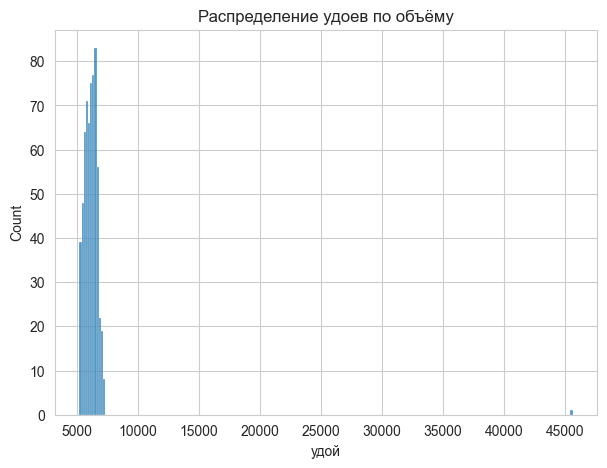

In [66]:
# Гисторграмма распределения удоя коров
plt.figure(figsize=(7,5))
sns.histplot(data=ferma_main['удой'])
plt.title('Распределение удоев по объёму')
plt.show()

Удой в 45000 кг молока в год точно невозможен, значит это выброс и его нужно удалить.

In [68]:
ferma_main = ferma_main.query('удой <= 10000')

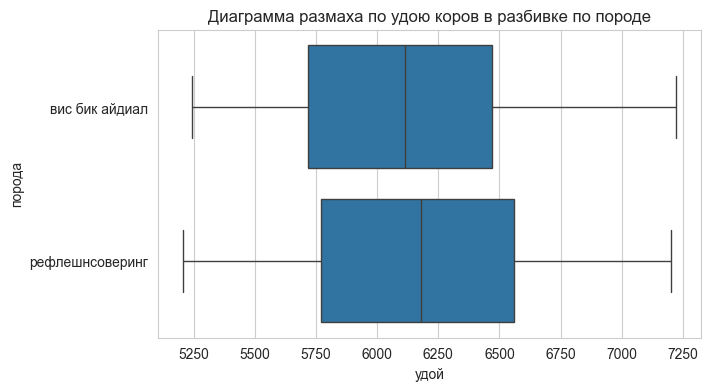

In [69]:
plt.figure(figsize=(7,4))
sns.boxplot(data=ferma_main, x='удой', y='порода')
plt.title('Диаграмма размаха по удою коров в разбивке по породе')
plt.show()

In [70]:
ferma_main['удой'].describe() # Проверка данных в столбце Удой 

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

Средний удой находится в районе 6200 кг молока в год и почти не зависит от породы коровы.

### 3.2. ЭКЕ (Энергетическая кормовая единица)

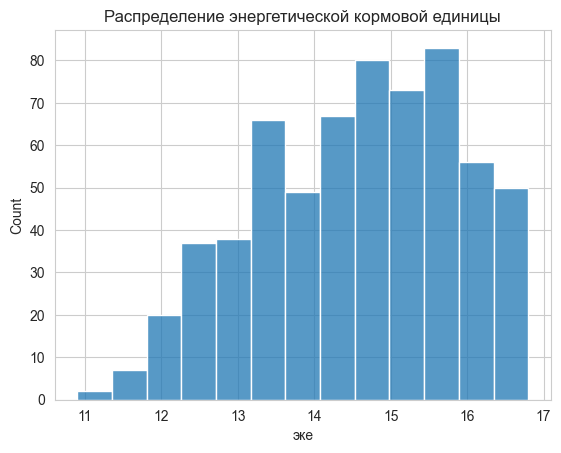

In [73]:
sns.histplot(data=ferma_main['эке'])
plt.title('Распределение энергетической кормовой единицы')
plt.show()

График имеет нормальное распределение со смещением вправо. Выбросов и аномалий нет.

### 3.3. Сырой протеин, г

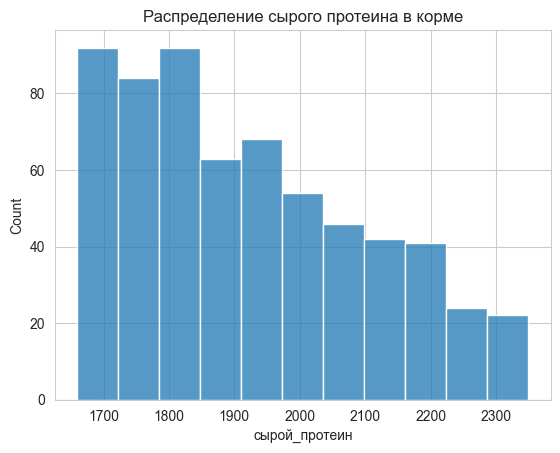

In [76]:
sns.histplot(data=ferma_main['сырой_протеин'])
plt.title('Распределение сырого протеина в корме')
plt.show()

Чаще всего встречается низкое содержание протеина в корме 1700-1800 грамм и чем выше значение показателя, тем реже оно встречается. Выбросов и аномалий нет.

### 3.4. СПО (Сахаро-протеиновое соотношение)

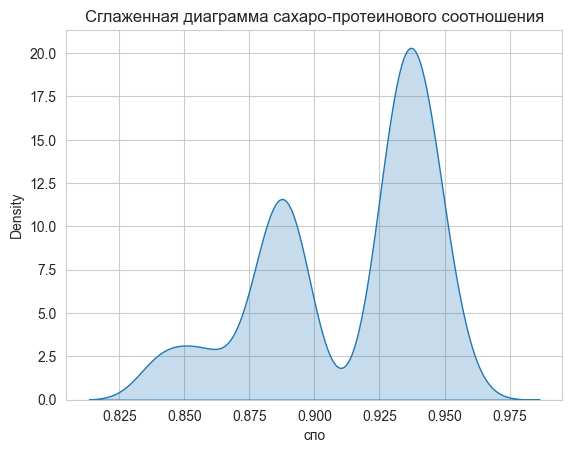

In [79]:
sns.kdeplot(data=ferma_main['спо'], fill=True)
plt.title('Сглаженная диаграмма сахаро-протеинового соотношения')
plt.show()

Распределение сахаро-протеинового соотношения имеет два пика: около 0.890 и 0.940. Выбросов и аномалий нет.

### 3.5. Порода

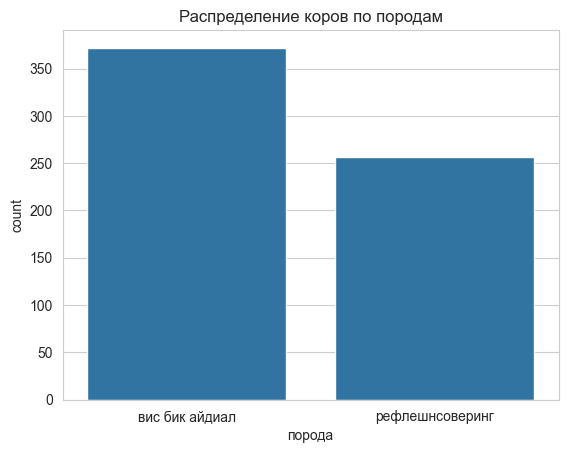

In [82]:
sns.countplot(data=ferma_main, x='порода')
plt.title('Распределение коров по породам')
plt.show()

Больше всего коров породы Вис Бик Айдиал. Выбросов и аномалий нет.

### 3.6. Тип пастбища

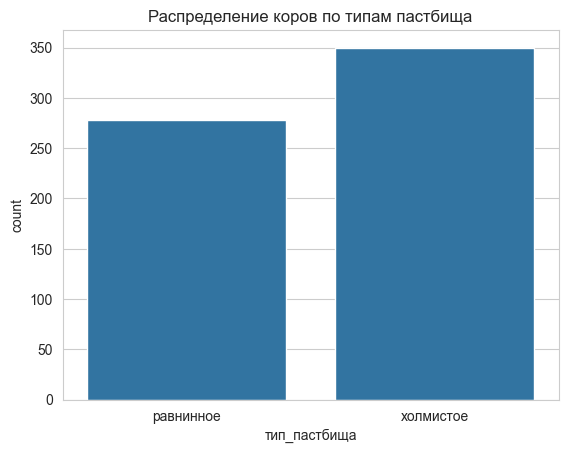

In [85]:
sns.countplot(data=ferma_main, x='тип_пастбища')
plt.title('Распределение коров по типам пастбища')
plt.show()

Больше всего холмистых пастбищ. Выбросов и аномалий нет.

### 3.7. Порода папы коровы

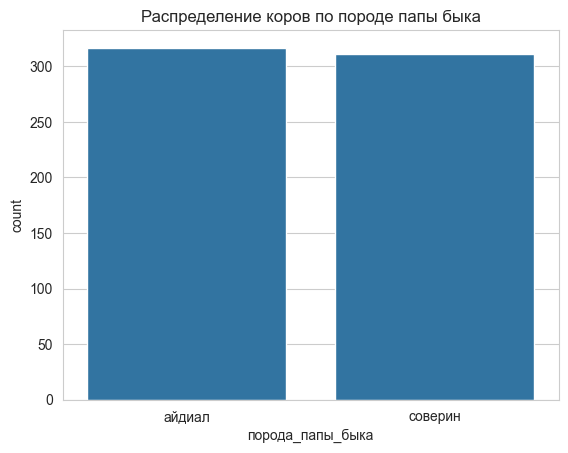

In [88]:
sns.countplot(data=ferma_main, x='порода_папы_быка')
plt.title('Распределение коров по породе папы быка')
plt.show()

Породы пап коров разделились практически поровну. Выбросов и аномалий нет.

### 3.8. Жирность,%

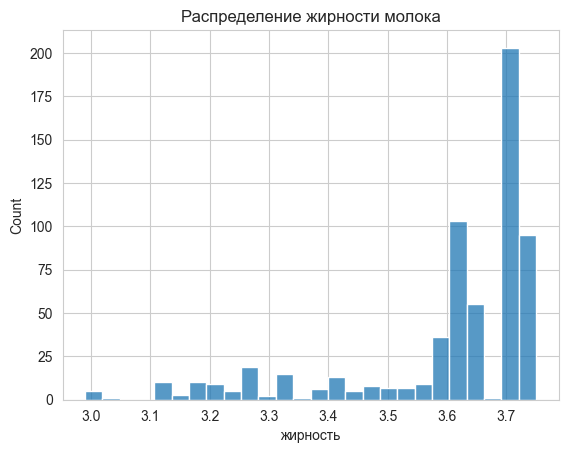

In [91]:
sns.histplot(data=ferma_main['жирность'])
plt.title('Распределение жирности молока')
plt.show()

In [92]:
ferma_main['жирность'].describe() # Общая информация о данных в столбце Жирность

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

Жирность молока коров варьируется от 2.99 до 3.75 %. Имеются два пика в районе 3.6 и 3.7 % жирности. Выбросов и аномалий нет.

### 3.9. Белок,% 

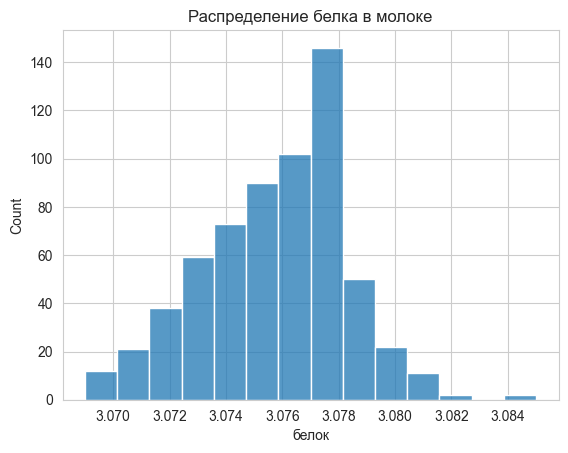

In [95]:
sns.histplot(data=ferma_main['белок'], bins=14)
plt.title('Распределение белка в молоке')
plt.show()

График распределения белка имеет нормальную форму распределения с пиком в районе 3.077. Выбросов и аномалий нет.

### 3.10. Вкус молока

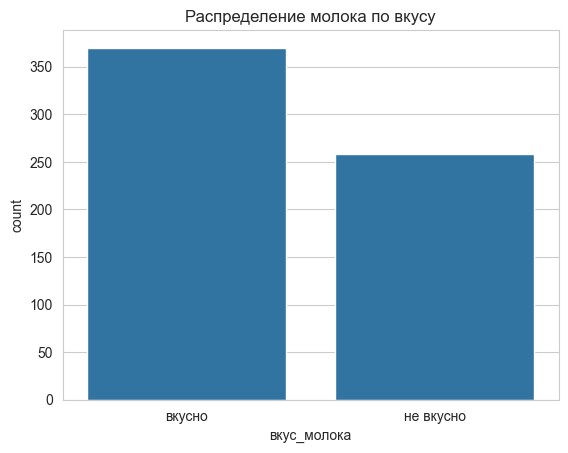

In [98]:
sns.countplot(data=ferma_main, x='вкус_молока')
plt.title('Распределение молока по вкусу')
plt.show()

Больше всего на ферме оказалось вкусного молока.

### 3.11. Возраст коровы

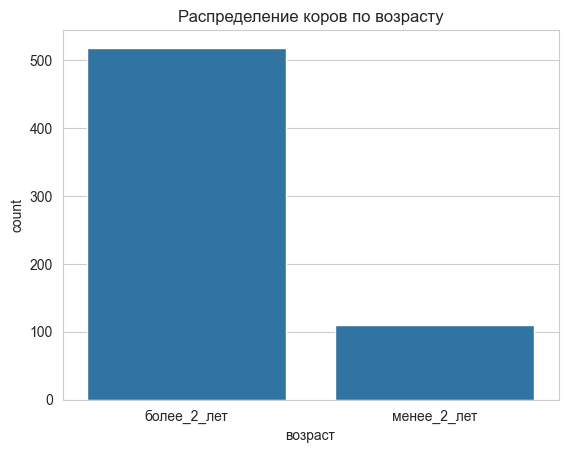

In [101]:
sns.countplot(data=ferma_main, x='возраст')
plt.title('Распределение коров по возрасту')
plt.show()

Коров старше 2-х лет подавляющее большинство, более 500 голов.

**Итоги раздела:**
* был обнаружен и удалён выброс в удое молока, в остальных данных выбросов и аномалий замечено не было;
* средний удой находится в районе 6200 кг молока в год и почти не зависит от породы коровы;
* график распределения энергетической кормовой единицы имеет нормальное распределение со смещением вправо;
* распределение сырого белка в молоке имеет скос влево и вариьруется от 1700 до 2300 грамм;
* распределение сахаро-протеинового соотношения имеет два пика: около 0.890 и 0.940;
* самая многочисленная порода коров - РефлешнСоверинг, чуть более 350 голов;
* больше всего холмистых пастбищ;
* породы пап коров разделились практически поровну;
* жирность молока варьируется от 2.99 до 3.75 %, с двумя пиками в районе 3.6 и 3.7 %;
* молочный белок имеет нормальное распределение с пиком в районе 3.077;
* на ферме вкусного молока больше, чем невкусного;
* коров старше 2-х лет подавляющее большинство, более 500 голов.

## 4 Шаг. Корреляционный анализ

### 4.1. Общая корреляция между признаками

In [106]:
# Матрица корреляции Phik между всеми признаками
corr_ferma = ferma_main.phik_matrix(verbose= False)
corr_ferma

id      удой       эке  сырой_протеин       спо  \
id                1.000000  0.000000  0.000000       0.115822  0.382303   
удой              0.000000  1.000000  0.720719       0.463224  0.661359   
эке               0.000000  0.720719  1.000000       0.456484  0.591190   
сырой_протеин     0.115822  0.463224  0.456484       1.000000  0.387188   
спо               0.382303  0.661359  0.591190       0.387188  1.000000   
порода            0.611843  0.164744  0.123086       0.090925  0.062660   
тип_пастбища      0.037776  0.279540  0.106758       0.096474  0.155349   
порода_папы_быка  0.320977  0.519915  0.171355       0.000000  0.425601   
жирность          0.519949  0.707654  0.715914       0.397380  0.645581   
белок             0.000000  0.058970  0.000000       0.202474  0.073787   
вкус_молока       0.039659  0.173122  0.272265       0.176480  0.572702   
возраст           0.000000  0.998101  0.771596       0.351685  0.744410   

                    порода  тип_пастбища  порода_папы_быка  жирность  \
id                0.611843      0.037776          0.320977  0.519949   
удой              0.164744      0.279540          0.519915  0.707654   
эке               0.123086      0.106758          0.171355  0.715914   
сырой_протеин     0.090925      0.096474          0.000000  0.397380   
спо               0.062660      0.155349          0.425601  0.645581   
порода            1.000000      0.213218          0.089330  0.222825   
тип_пастбища      0.213218      1.000000          0.000000  0.000000   
порода_папы_быка  0.089330      0.000000          1.000000  0.000000   
жирность          0.222825      0.000000          0.000000  1.000000   
белок             0.361851      0.099908          0.134582  0.000000   
вкус_молока       0.000000      0.269063          0.000000  0.198793   
возраст           0.057295      0.128455          0.355817  0.677913   

                     белок  вкус_молока   возраст  
id                0.000000     0.039659  0.000000  
удой              0.058970     0.173122  0.998101  
эке               0.000000     0.272265  0.771596  
сырой_протеин     0.202474     0.176480  0.351685  
спо               0.073787     0.572702  0.744410  
порода            0.361851     0.000000  0.057295  
тип_пастбища      0.099908     0.269063  0.128455  
порода_папы_быка  0.134582     0.000000  0.355817  
жирность          0.000000     0.198793  0.677913  
белок             1.000000     0.143857  0.000000  
вкус_молока       0.143857     1.000000  0.165974  
возраст           0.000000     0.165974  1.000000

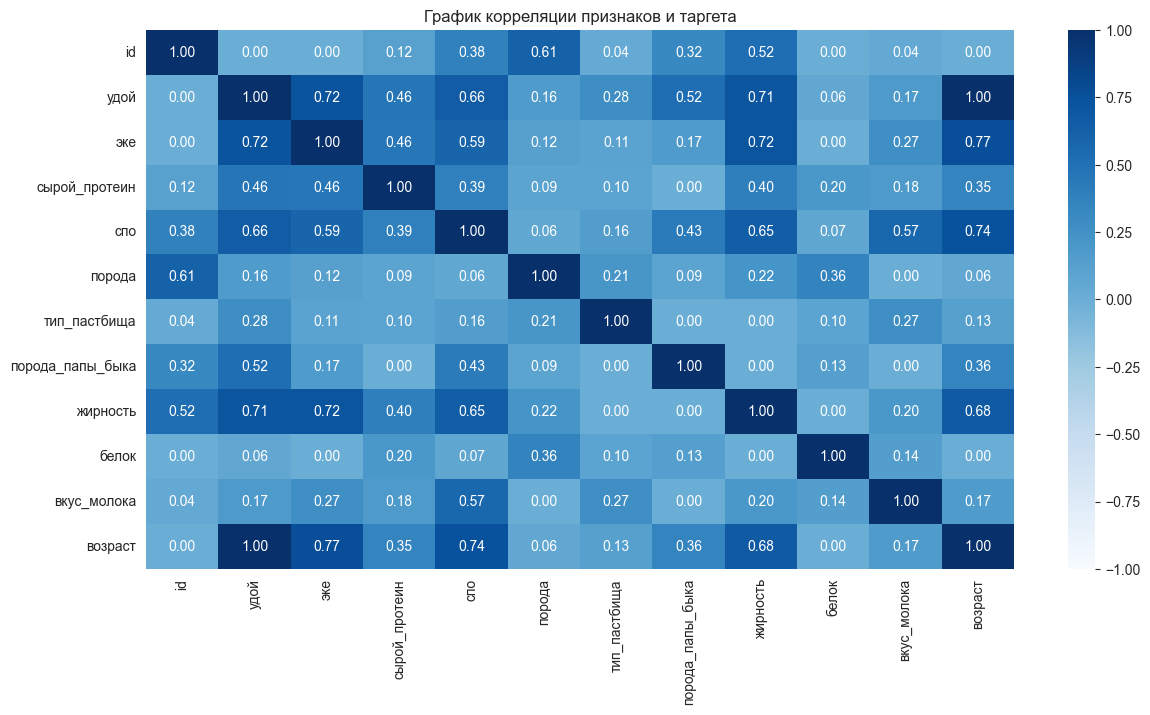

In [107]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_ferma, annot=True, cmap="Blues", vmin=-1, fmt='.2f')
plt.title('График корреляции признаков и таргета')
plt.show()

Согласно шкале Чеддока целевой признак Удой имеет **очень высокую** корреляцию с категориальным признаком Возраст, **высокую корреляцию** со входными признаками ЭКЕ и Жирность, **среднюю** с СПО и Породой папы быка, **слабую** с Сырым протеином и  **очень слабую** со Вкусом молока, Белком, Типом пастбища, ID и Породой коровы. Между признаками нет мультиколлинеарности.

### 4.2. Корреляция по подгруппам

In [110]:
# Функция для построения диаграмм рассеяния с линиями регрессии для каждого уникального значения категориального признака
def plot_all_hues(y, hues):
    data = ferma_main
    x = 'удой'
    
    fig, axes = plt.subplots(1, len(hues), figsize=(20, 5), sharey=True)
    
    for ax, hue in zip(axes, hues):
        sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, legend=False)
        for hue_value in data[hue].unique():
            sns.regplot(x=x, y=y, data=data[data[hue] == hue_value], ax=ax, scatter=False, label=hue_value)
        
        ax.set_title(f'Признак: {hue}')
        ax.legend(title=hue)
    
    plt.tight_layout()
    plt.show()

# Список всех категориальных признаков
hues = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

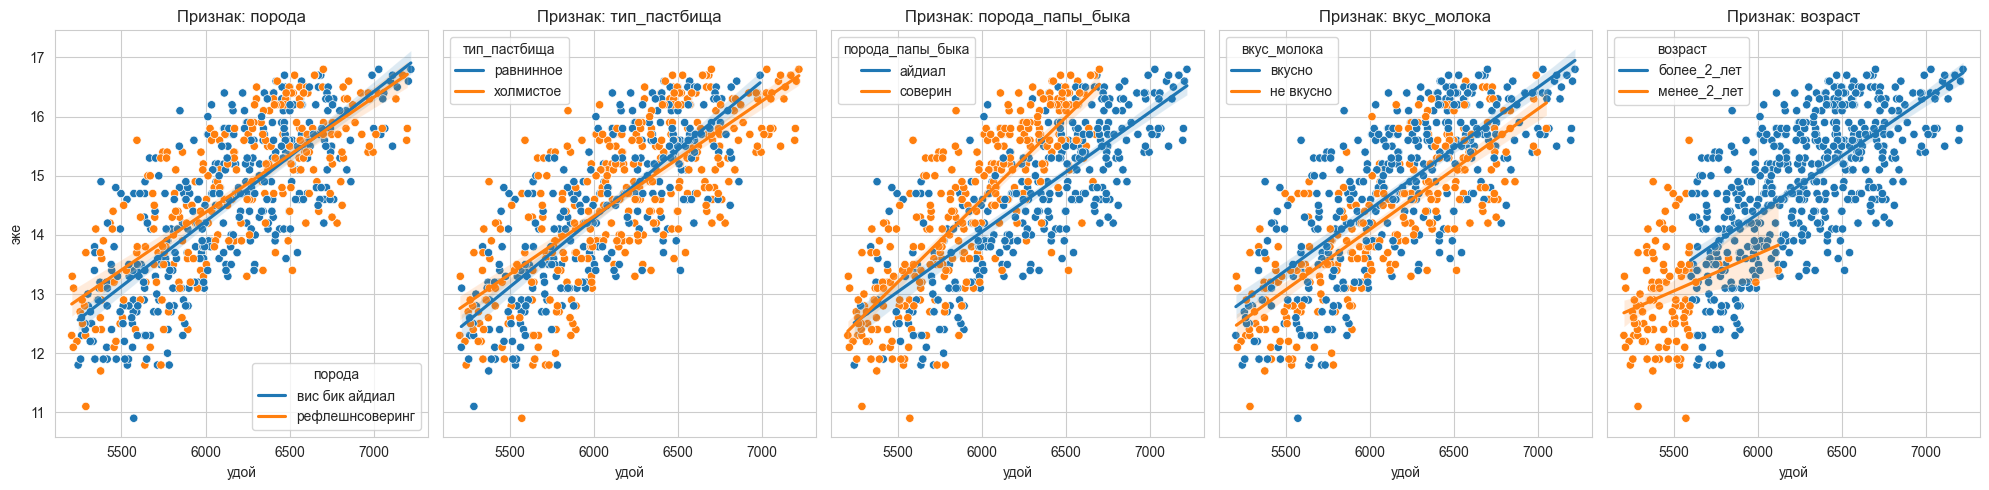

In [111]:
plot_all_hues(y='эке', hues=hues)

В целом между Удоем молока и ЭКЕ (Энергетической кормовой единицей) имеется высокая положительная корреляция. Связь нелинейна.

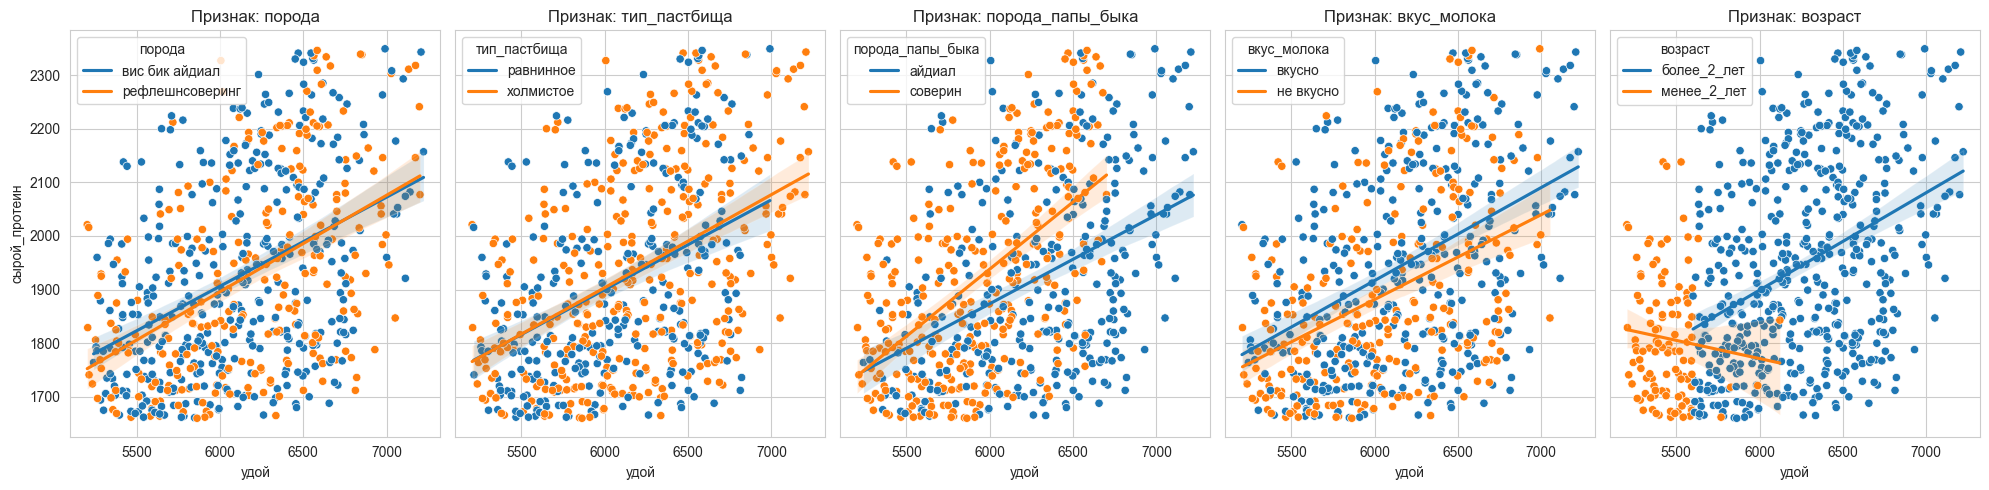

In [113]:
plot_all_hues(y='сырой_протеин', hues=hues)

Между Удоем и Сырым протеином слабая положительная корреляция в контексте категориальных признаков, кроме Возраста, где у коров младше 2-х лет наблюдается отрицательная корреляция, а у коров старше - положительная. Связь так же нелинейна.

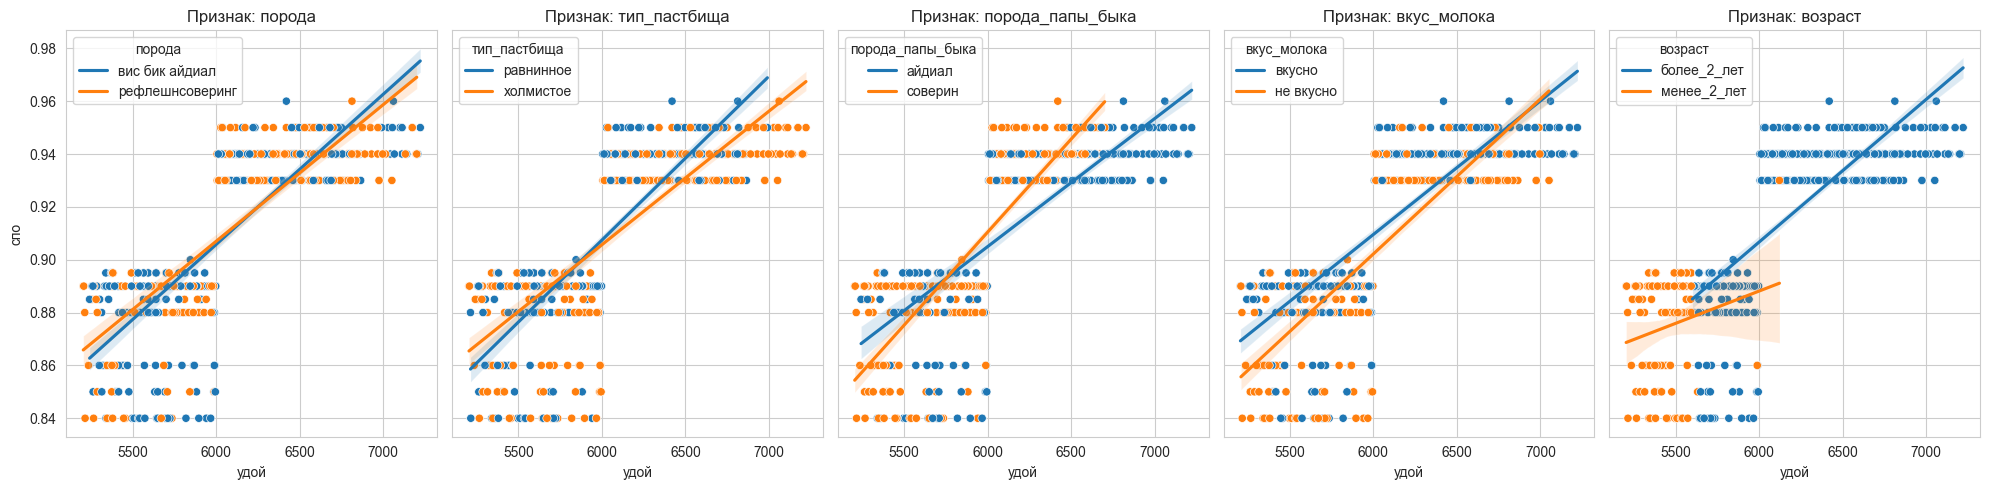

In [115]:
plot_all_hues(y='спо', hues=hues)

СПО (Сахаро-протеиновое соотношение) имеет бимодальное распределение. В целом наблюдается сильная положительная корреляция между Удоем и СПО в контексте категориальных признаков, кроме возраста, где на коров младше 2-х лет показатель СПО практически не влияет. Связь нелинейна, имеется два кластера.

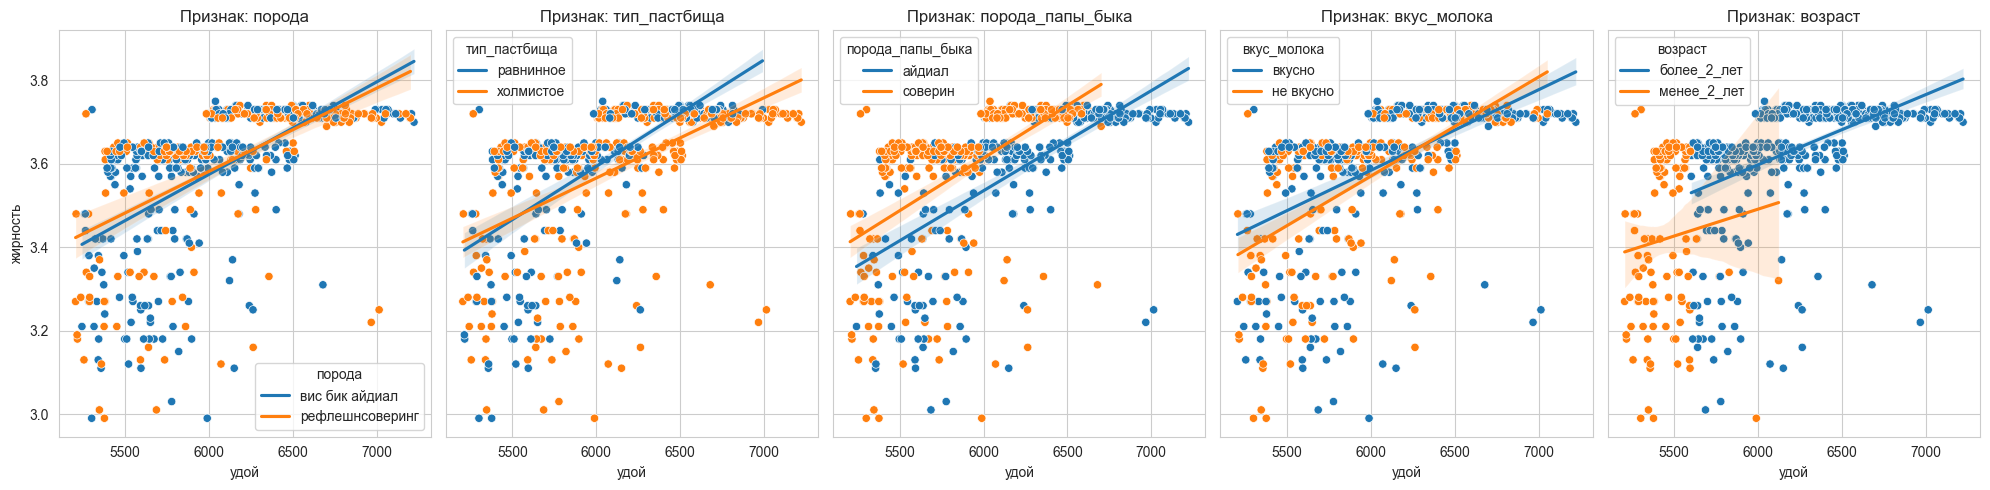

In [117]:
plot_all_hues(y='жирность', hues=hues)

Жирность молока так же имеет почти бимодальное распределение. Между Удоем и Жирностью есть средняя положительная корреляция, кроме признака Возраст, где на коров младше она практически не влияет. Связь нелинейна.

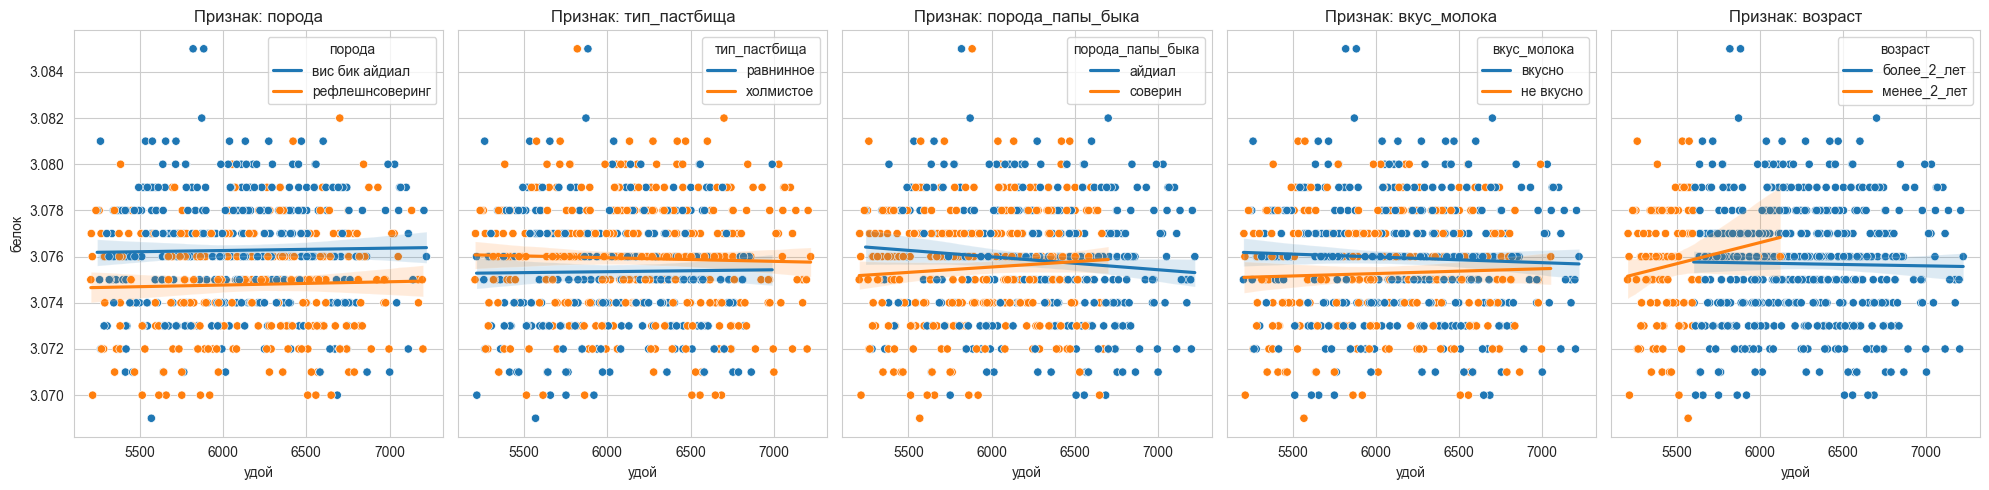

In [119]:
plot_all_hues(y='белок', hues=hues)

Между Удоями и Белком практически нет корреляции. Связь нелиейна.

**Итог раздела:**
* была выявлена выявлена корреляция между Удоем и входными признаками:
  * ЭКЕ, СПО - высокая;
  * Жирностью - средняя;
  * Сырым протеином - слабая;
  * Белком - отсутствие корреляции.
* коровы младше 2-х лет слабо поддаются влиянию каких-либо признаков;
* между целевым и входными признаками не все связи линейные.

## 5 Шаг. Обучение модели линейной регрессии

### 5.1. Первая модель линейной регрессии

**Количественные признаки:**
* для модели линейной регрессии очень важна сильная линейная связь между входными и целевым признаком(Удой), на основании этого подходят входные признаки: ЭКЕ, СПО и Жирность. Но если рассуждать логически, Жирность молока является его характеристикой и никак не может повлиять на его количество, то есть на Удой, значит этот входной признак можно убрать из исследования. Так же признак ID никак не связан с целевым.

**Категориальные признаки:**
* судя по матрице высокую корреляцию с целевым признаком имеют: Возраст, Порода папы быка.

In [125]:
# Создание датафрейма только с подходящими признаками
ferma_main_clean = ferma_main[['id', 'удой', 'спо', 'эке', 'возраст', 'порода_папы_быка', 'порода', 'тип_пастбища']]
ferma_main_clean.head()

id  удой    спо   эке      возраст порода_папы_быка           порода  \
0   1  5863  0.890  14.2  более_2_лет           айдиал   вис бик айдиал   
1   2  5529  0.890  12.8  менее_2_лет          соверин   вис бик айдиал   
2   3  5810  0.885  14.0  более_2_лет          соверин  рефлешнсоверинг   
3   4  5895  0.885  12.4  более_2_лет           айдиал  рефлешнсоверинг   
4   5  5302  0.885  12.8  менее_2_лет          соверин   вис бик айдиал   

  тип_пастбища  
0    равнинное  
1    равнинное  
2    холмистое  
3    холмистое  
4    равнинное

In [126]:
# Построение первой модели линейной регрессии

RANDOM_STATE = 42

X = ferma_main_clean.drop('удой', axis=1)
y = ferma_main_clean['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['возраст', 'порода_папы_быка', 'порода', 'тип_пастбища']
num_col_names = ['спо', 'эке']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions_1 = model_lr.predict(X_test)

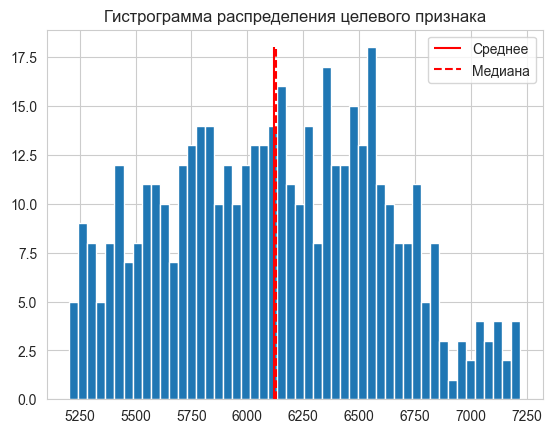

In [127]:
# Построение графика распределения целевого признака (Удой)
bins = plt.hist(y_train, bins=50)
plt.vlines(x=y_train.mean(), colors='red', ymin=0, ymax=bins[0].max(), label='Среднее')
plt.vlines(x=y_train.median(), colors='red', ymin=0, ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистрограмма распределения целевого признака')
plt.legend()
plt.show()

Распределение целевого признака имеет форму, близкую к нормальному, с небольшими отклонениями. Среднее значение и медиана находятся близко друг к другу, что указывает на симметричное распределение данных.

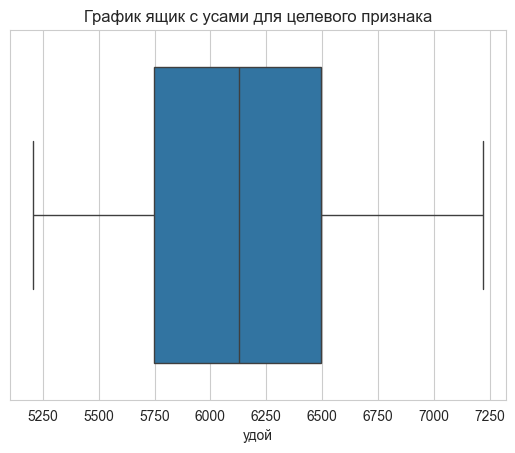

In [129]:
sns.boxplot(data=y_train, orient='h')
plt.title('График ящик с усами для целевого признака')
plt.show()

Выбросов в целевом признаке нет, медиана находится в районе 6100 кг. 

In [131]:
# Расчет коэффициента детерминации
r2_1 = r2_score(y_test, predictions_1)
r2_1

0.7786264551426364

In [132]:
# Нахождение остатков
residuals_1 = y_test - predictions_1
residuals_1

582    -70.164928
592     52.466350
551    -66.859583
214    -85.790122
486   -380.603608
          ...    
84      11.189096
285    399.510515
577   -255.368099
80    -560.021226
24    -377.483088
Name: удой, Length: 157, dtype: float64

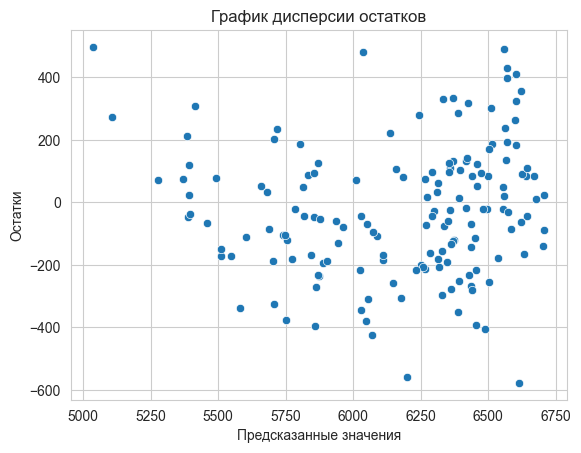

In [133]:
sns.scatterplot(x=predictions_1, y=residuals_1)

plt.title('График дисперсии остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.show()

Диспресия остатков неравномерна и имеет форму "рупора", это значит что модель работает неустойчиво.

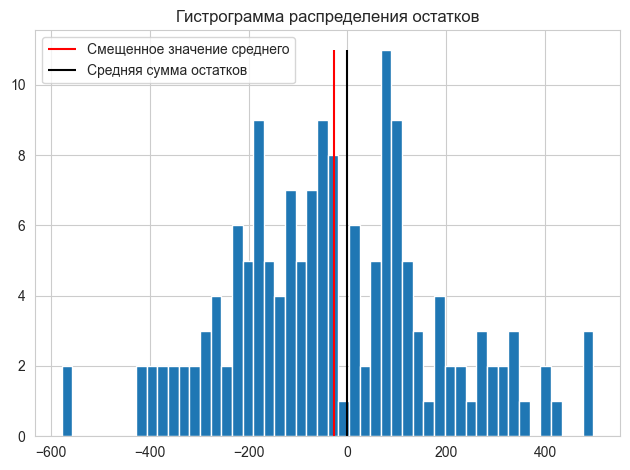

In [135]:
bins = plt.hist(residuals_1, bins=50)

plt.vlines(x=residuals_1.mean(), colors='red', ymin=0, ymax=bins[0].max(), label='Смещенное значение среднего')
plt.vlines(0, colors='black', ymin=0, ymax=bins[0].max(), label='Средняя сумма остатков')
plt.title('Гистрограмма распределения остатков')
plt.legend()
plt.tight_layout()
plt.show()

Распределение остатков не похоже на нормальное, имеет два "горба" и несколько выбросов с обеих сторон. Так же среднее значение смещено влево, это значит что модель даёт слишком большие предсказания, её прогнозы больше истинных значений. 

**Выводы по первой модели:**
* значение метрики R² = 0.78, это значит что модель даёт верные предсказания в 78%;
* анализ остатков показал, что дисперсия остатков непостоянная и среднее значение остатков смещено влево, а это значит что модель даёт слишком большие предсказания;
* модель нуждается в улучшении и доработке, сейчас её использовать нельзя.

### 5.2. Вторая модель линейной регрессии

In [139]:
# Превращение признака СПО в категориальный бинарный для устранения нелинейной связи между ним и целевым признаком
ferma_main_clean = ferma_main_clean.copy()
ferma_main_clean['спо'] = pd.to_numeric(ferma_main_clean['спо'], errors='coerce')
ferma_main_clean['спо'] = ferma_main_clean['спо'].apply(lambda x: 'большое' if x >= 0.91 else 'маленькое')

In [140]:
# Исключение нелинейности между Удоем и ЭКЕ возведением признака ЭКЕ в квадрат
ferma_main_clean['эке_квадрат'] = ferma_main_clean['эке'] ** 2
ferma_main_clean.drop(columns='эке', inplace=True) # Удаление старого столбца 
ferma_main_clean.head()

id  удой        спо      возраст порода_папы_быка           порода  \
0   1  5863  маленькое  более_2_лет           айдиал   вис бик айдиал   
1   2  5529  маленькое  менее_2_лет          соверин   вис бик айдиал   
2   3  5810  маленькое  более_2_лет          соверин  рефлешнсоверинг   
3   4  5895  маленькое  более_2_лет           айдиал  рефлешнсоверинг   
4   5  5302  маленькое  менее_2_лет          соверин   вис бик айдиал   

  тип_пастбища  эке_квадрат  
0    равнинное       201.64  
1    равнинное       163.84  
2    холмистое       196.00  
3    холмистое       153.76  
4    равнинное       163.84

In [141]:
# Построение второй модели линейной регрессии
RANDOM_STATE = 42

X = ferma_main_clean.drop('удой', axis=1)
y = ferma_main_clean['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['возраст', 'порода_папы_быка', 'спо', 'порода', 'тип_пастбища']
num_col_names = ['эке_квадрат']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions_2 = model_lr.predict(X_test)

In [142]:
r2_2 = r2_score(y_test, predictions_2)
r2_2

0.8147611518654809

In [143]:
residuals_2 = y_test - predictions_2
residuals_2

582     19.654309
592     16.860508
551   -137.473757
214    -49.163929
486   -268.061662
          ...    
84     -51.479362
285    407.615859
577   -260.787763
80    -407.458241
24    -239.346023
Name: удой, Length: 157, dtype: float64

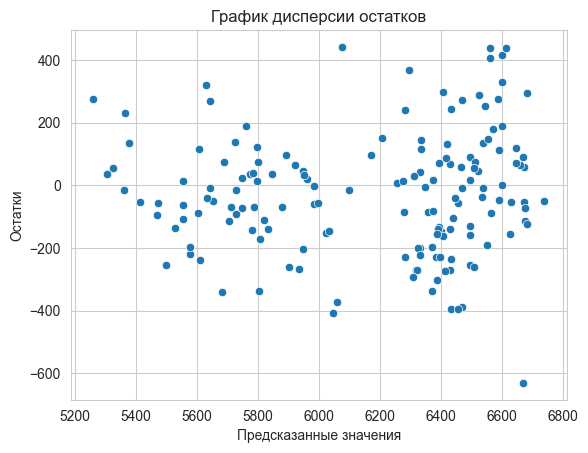

In [144]:
sns.scatterplot(x=predictions_2, y=residuals_2)

plt.title('График дисперсии остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.show()

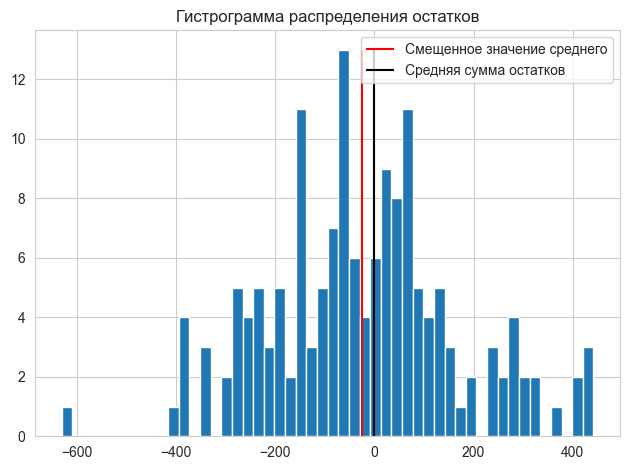

In [145]:
bins = plt.hist(residuals_2, bins=50)

plt.vlines(x=residuals_2.mean(), colors='red', ymin=0, ymax=bins[0].max(), label='Смещенное значение среднего')
plt.vlines(0, colors='black', ymin=0, ymax=bins[0].max(), label='Средняя сумма остатков')
plt.title('Гистрограмма распределения остатков')
plt.legend()
plt.tight_layout()
plt.show()

**Выводы по второй модели:**
* значение метрики R² = 0.81, это значит что модель даёт верные предсказания в 81%, результат на 3% лучше, чем в первой версии модели;
* дисперсия остатков так же осталась непостоянной и среднее значение распределения остатков так же смещено влево;
* модель использовать нельзя, необходима доработка.

### 5.3. Третья модель линейной регрессии

In [148]:
# Добавление нового признака Имя папы
ferma_main_clean = ferma_main_clean.merge(ferma_dad, on='id', how='inner')
ferma_main_clean.head()

id  удой        спо      возраст порода_папы_быка           порода  \
0   1  5863  маленькое  более_2_лет           айдиал   вис бик айдиал   
1   2  5529  маленькое  менее_2_лет          соверин   вис бик айдиал   
2   3  5810  маленькое  более_2_лет          соверин  рефлешнсоверинг   
3   4  5895  маленькое  более_2_лет           айдиал  рефлешнсоверинг   
4   5  5302  маленькое  менее_2_лет          соверин   вис бик айдиал   

  тип_пастбища  эке_квадрат  имя_папы  
0    равнинное       201.64    буйный  
1    равнинное       163.84  соловчик  
2    холмистое       196.00     барин  
3    холмистое       153.76    буйный  
4    равнинное       163.84     барин

In [149]:
# Удаление ненужного признака 
ferma_main_clean = ferma_main_clean.drop('id', axis=1)

In [150]:
# Построение третьей модели линейной регресии

X = ferma_main_clean.drop('удой', axis=1)
y = ferma_main_clean['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['возраст', 'порода_папы_быка', 'спо', 'порода', 'тип_пастбища', 'имя_папы']
num_col_names = ['эке_квадрат']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
x_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions_3 = model_lr.predict(X_test)

In [151]:
r2_3 = r2_score(y_test, predictions_3)
r2_3

0.8216699921420691

In [152]:
residuals_3 = y_test - predictions_3
residuals_3

581    -47.974464
591    -16.820643
550   -167.346067
213    -13.539158
485   -263.864019
          ...    
83     211.609285
284    370.299222
576   -266.456951
79    -462.324767
23    -284.754410
Name: удой, Length: 157, dtype: float64

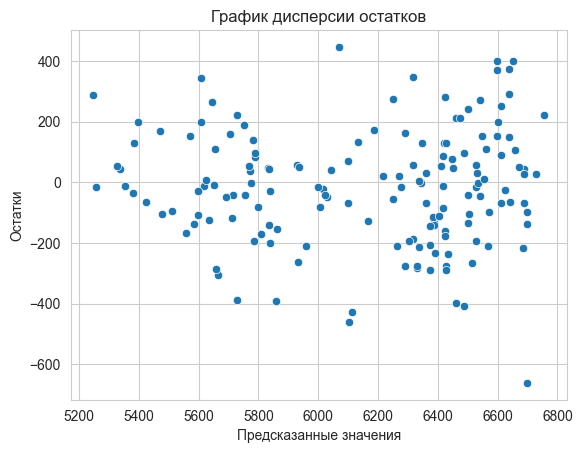

In [153]:
sns.scatterplot(x=predictions_3, y=residuals_3)

plt.title('График дисперсии остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.show()

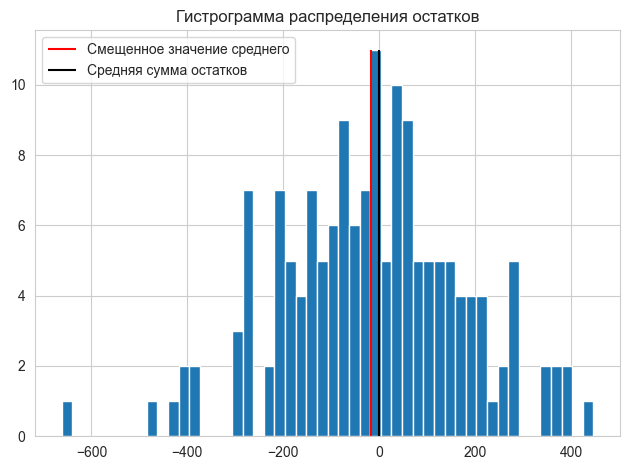

In [154]:
bins = plt.hist(residuals_3, bins=50)

plt.vlines(x=residuals_3.mean(), colors='red', ymin=0, ymax=bins[0].max(), label='Смещенное значение среднего')
plt.vlines(0, colors='black', ymin=0, ymax=bins[0].max(), label='Средняя сумма остатков')
plt.title('Гистрограмма распределения остатков')
plt.legend()
plt.tight_layout()
plt.show()

**Выводы по третьей модели:**
* значение метрики R² = 0.82, выросло на 1%;
* диспресия остатков стала практически равномерной;
* значение среднего распределения остатков так же практически сравнялось с расчетным средним;
* эту модель можно использовать.

### 5.4. Сравнение моделей

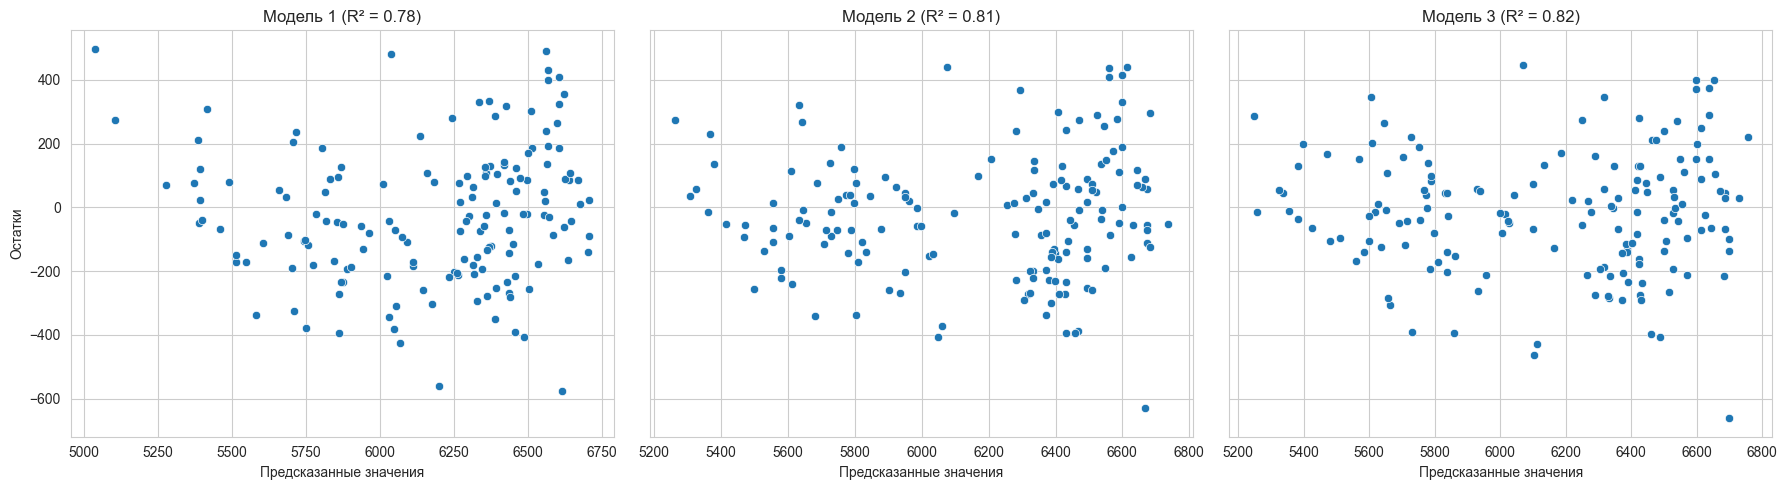

In [157]:
# Построение графиков дисперсии остатков для всех моделей на одной фигуре
predictions = [predictions_1, predictions_2, predictions_3]
residuals = [residuals_1, residuals_2, residuals_3]
r2_scores = [r2_1, r2_2, r2_3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i in range(3):
    sns.scatterplot(x=predictions[i], y=residuals[i], ax=axes[i])
    axes[i].set_title(f'Модель {i+1} (R² = {r2_scores[i]:.2f})')
    axes[i].set_xlabel('Предсказанные значения')
    if i == 0:
        axes[i].set_ylabel('Остатки')

plt.tight_layout()
plt.show()

Третья модель имеет оптимальный R² = 0.82 и практически равномерное распределение дисперсии остатков.

In [159]:
# Функция для расчёта метрик моделей линейной регрессии
def metrics(name, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    return f'{name}: MSE = {mse:.2f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}'

In [160]:
metrics('Модель 1', predictions_1)

'Модель 1: MSE = 45063.90, RMSE = 212.28, MAE = 171.76'

In [161]:
metrics('Модель 2', predictions_2)

'Модель 2: MSE = 37708.14, RMSE = 194.19, MAE = 152.74'

In [162]:
metrics('Модель 3', predictions_3)

'Модель 3: MSE = 36301.74, RMSE = 190.53, MAE = 148.70'

Третья модель имеет самые хорошие показатели и практически равномерное распределение остатков, её и выберем лучшей.

In [164]:
f'Доверительный интервал для лучшей модели от {np.quantile(residuals_3, 0.025):.2f} до {np.quantile(residuals_3, 0.975):.2f}'

'Доверительный интервал для лучшей модели от -398.08 до 370.79'

### 5.5. Прогноз удоя коров.

In [166]:
# Добавление признаков в датафрейм продавца
cow_buy['сырой_протеин'] = ferma_main['сырой_протеин'].mean() * 1.05
cow_buy['эке_квадрат'] = ferma_main_clean['эке_квадрат'].mean() * 1.05
cow_buy['спо'] = ferma_main['спо'].mean() * 1.05
cow_buy.head()

порода тип_пастбища порода_папы_быка  имя_папы  жирность  белок  \
0   вис бик айдиал    холмистое           айдиал  геркулес      3.58  3.076   
1   вис бик айдиал    равнинное          соверин    буйный      3.54  3.081   
2  рефлешнсоверинг    равнинное          соверин     барин      3.59  3.074   
3  рефлешнсоверинг    холмистое           айдиал    буйный      3.40  3.061   
4  рефлешнсоверинг    равнинное           айдиал    буйный      3.64  3.074   

       возраст  сырой_протеин  эке_квадрат       спо  
0  более_2_лет    2019.947532   224.025225  0.958744  
1  менее_2_лет    2019.947532   224.025225  0.958744  
2  более_2_лет    2019.947532   224.025225  0.958744  
3  более_2_лет    2019.947532   224.025225  0.958744  
4  более_2_лет    2019.947532   224.025225  0.958744

In [167]:
cow_buy['спо'] = cow_buy['спо'].astype(str)  # Преобразование колонки в строковый тип
cow_buy['спо'] = cow_buy['спо'].apply(lambda x: 'большое' if float(x) >= 0.91 else 'маленькое')
cow_reg = cow_buy.copy()
cow_reg.head()

порода тип_пастбища порода_папы_быка  имя_папы  жирность  белок  \
0   вис бик айдиал    холмистое           айдиал  геркулес      3.58  3.076   
1   вис бик айдиал    равнинное          соверин    буйный      3.54  3.081   
2  рефлешнсоверинг    равнинное          соверин     барин      3.59  3.074   
3  рефлешнсоверинг    холмистое           айдиал    буйный      3.40  3.061   
4  рефлешнсоверинг    равнинное           айдиал    буйный      3.64  3.074   

       возраст  сырой_протеин  эке_квадрат      спо  
0  более_2_лет    2019.947532   224.025225  большое  
1  менее_2_лет    2019.947532   224.025225  большое  
2  более_2_лет    2019.947532   224.025225  большое  
3  более_2_лет    2019.947532   224.025225  большое  
4  более_2_лет    2019.947532   224.025225  большое

In [169]:
# Получение прогноза удоя коров на датафрейме продавца
cat_col_names = ['возраст', 'порода_папы_быка', 'спо', 'порода', 'тип_пастбища', 'имя_папы']
num_col_names = ['эке_квадрат']

X_test_ohe = encoder.transform(cow_reg[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_test_scaled = scaler.transform(cow_reg[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

predictions_4 = model_lr.predict(X_test)
predictions_4

array([6554.62663032, 6315.0872549 , 6230.6883745 , 6537.49117017,
       6482.01537146, 6358.08056796, 6554.62663032, 6515.25319535,
       6230.6883745 , 6337.32522972, 6313.33245568, 6558.24650842,
       6554.62663032, 6073.0693063 , 6230.6883745 , 6537.49117017,
       6313.33245568, 6358.08056796, 6515.25319535, 6482.01537146])

По показателю Удой фермеру подходят все 20 коров от продавца.

### Шаг 6. Построение модели логистической регресии

### 6.1. Построение первой модели логистической регрессии

In [173]:
# Создание нового датафрема для построения модели логистической регрессии
ferma_log = ferma_main.copy()
ferma_log['спо'] = ferma_log['спо'].apply(lambda x: 'большое' if x >= 0.91 else 'маленькое')
ferma_log['эке_квадрат'] = ferma_log['эке'] ** 2
ferma_log.drop(columns='эке', inplace=True)
ferma_log['возраст'] = ferma_log['возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)
ferma_log['вкус_молока'] = ferma_log['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [174]:
# создание первой модели логистической регрессии
RANDOM_STATE = 42

X = ferma_log.drop('вкус_молока', axis=1)
y = ferma_log['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо']
num_col_names = ['эке_квадрат', 'сырой_протеин', 'жирность' , 'белок']

encoder = OneHotEncoder(drop='first', sparse_output=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

In [175]:
# Расчёт доли верных ответов модели
accuracy = accuracy_score(y_test, y_pred)  
accuracy

0.6242038216560509

In [176]:
# Расчёт точности присвоения класса 1
precision = precision_score(y_test, y_pred)
precision

0.6198347107438017

In [177]:
# Расчёт полноты присвоения класса 1
recall = recall_score(y_test, y_pred)       
recall

0.8522727272727273

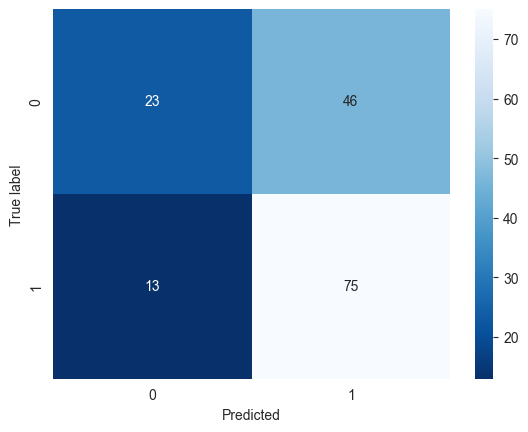

In [178]:
# Матрица ошибок модели
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

plt.show()

**Выводы:**
* метрика Accuracy имеет значение 0.62, это значит что модель даёт верные предсказания в 62% случаев, это очень низкий показатель и для выполнения ТЗ заказчика придётся задирать порог;
* метрика Recall имеет значение 0.85, это значит что модель в 85% случаев верно присвоила класс 1 (вкусное молоко) всем объектам этого класса; ошибка FN - второй тип;
* метрика Precision = 0.62, то есть модель в 38% случаев неверно присвоила класс 1 объектам класса 0. Это ошибка FP - первый тип;
* для заказчика главное вкусное молоко, то есть верно определить объекты класса 1, значит нужно исключить ошибку FP (метрика Precision).

### 6.2. Настройка модели логистической регрессии

In [181]:
# Создание датафрейма с верными значениями целевого признака и предсказанной вероятностью
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head()

y_valid   y_proba
85         1  0.840053
66         1  0.836407
110        1  0.830937
51         1  0.824273
146        1  0.821653

In [182]:
# Создание порогов 
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 20,endpoint=False)]
print(thresholds)

[0.1, 0.15, 0.19, 0.24, 0.28, 0.32, 0.37, 0.42, 0.46, 0.5, 0.55, 0.6, 0.64, 0.68, 0.73, 0.77, 0.82, 0.86, 0.91, 0.96]


In [183]:
# Добавление порогов в таблицу
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0 )

In [184]:
# Расчёт оптимального порога модели для достижения метрики Precision = 1 
precision_scores = []
for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred, zero_division=0)
    precision_scores.append((threshold, precision))

for threshold, precision in precision_scores:
    print(f"Значение порога: {threshold}, Precision: {precision}")

Значение порога: 0.1, Precision: 0.5605095541401274
Значение порога: 0.15, Precision: 0.5605095541401274
Значение порога: 0.19, Precision: 0.5605095541401274
Значение порога: 0.24, Precision: 0.5641025641025641
Значение порога: 0.28, Precision: 0.5641025641025641
Значение порога: 0.32, Precision: 0.5761589403973509
Значение порога: 0.37, Precision: 0.5655172413793104
Значение порога: 0.42, Precision: 0.5766423357664233
Значение порога: 0.46, Precision: 0.6030534351145038
Значение порога: 0.5, Precision: 0.6198347107438017
Значение порога: 0.55, Precision: 0.6486486486486487
Значение порога: 0.6, Precision: 0.717391304347826
Значение порога: 0.64, Precision: 0.75
Значение порога: 0.68, Precision: 0.7959183673469388
Значение порога: 0.73, Precision: 0.8529411764705882
Значение порога: 0.77, Precision: 0.8823529411764706
Значение порога: 0.82, Precision: 1.0
Значение порога: 0.86, Precision: 0.0
Значение порога: 0.91, Precision: 0.0
Значение порога: 0.96, Precision: 0.0


Исходя из расчётов видно, что значение метрики Precision равно 1, то есть 100%, при пороге классификации 0.82. При пороге выше все значения будут отнесены к классу 0.

In [186]:
# Расчёт метрик модели при новом пороге
threshold = 0.82
y_pred_custom_threshold = (y_proba >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_custom_threshold)
recall = recall_score(y_test, y_pred_custom_threshold)
precision = precision_score(y_test, y_pred_custom_threshold)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.4713375796178344
Recall: 0.056818181818181816
Precision: 1.0


При сведении критичной ошибки Precision к нулю, метрика Accuracy упала с 67% до 47%, а метрика Recall с 85% упала до 6%.

### 6.3. Прогноз вкуса молока

In [192]:
# Приведение столбца Возраст к тому формату, на котром обучалась модель
cow_buy['возраст'] = cow_buy['возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)

In [193]:
# Получение прогноза на данных продавца
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо']
num_col_names = ['эке_квадрат', 'сырой_протеин', 'жирность' , 'белок']

X_test_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_test_scaled = scaler.transform(cow_buy[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

y_pred = clf.predict_proba(X_test)[:,1]

## 7 Шаг. Итоговые выводы

In [195]:
# Выведу предсказанные вероятности по Вкусу молока
y_pred

array([0.66996737, 0.60396857, 0.49723374, 0.32442771, 0.51565954,
       0.08163471, 0.66996737, 0.60295191, 0.49723374, 0.71853409,
       0.16924408, 0.46560576, 0.08006816, 0.58368951, 0.49723374,
       0.42172617, 0.71419426, 0.07998001, 0.35660368, 0.51565954])

При пороге классификации 0.82 молоко ни одной коровы не будет являться Вкусным.

In [197]:
# Добавление прогноза Удоя и Вкуса в датафрейм продавца
cow_buy['прогноз_удоя'] = predictions_4
cow_buy['прогноз_вкуса'] = y_pred
cow_buy['прогноз_вкуса'] = cow_buy['прогноз_вкуса'].apply(lambda x: 'вкусное' if x == 1 else 'не_вкусное')
cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  жирность  белок  \
0    вис бик айдиал    холмистое           айдиал  геркулес      3.58  3.076   
1    вис бик айдиал    равнинное          соверин    буйный      3.54  3.081   
2   рефлешнсоверинг    равнинное          соверин     барин      3.59  3.074   
3   рефлешнсоверинг    холмистое           айдиал    буйный      3.40  3.061   
4   рефлешнсоверинг    равнинное           айдиал    буйный      3.64  3.074   
5   рефлешнсоверинг    равнинное          соверин  геркулес      3.63  3.053   
6    вис бик айдиал    холмистое           айдиал  геркулес      3.58  3.076   
7    вис бик айдиал    равнинное          соверин    буйный      3.57  3.079   
8   рефлешнсоверинг    равнинное          соверин     барин      3.59  3.074   
9   рефлешнсоверинг    холмистое           айдиал    буйный      3.40  3.079   
10   вис бик айдиал    холмистое          соверин  соловчик      3.73  3.055   
11  рефлешнсоверинг    равнинное          соверин  геркулес      3.73  3.073   
12   вис бик айдиал    холмистое           айдиал  геркулес      3.68  3.046   
13   вис бик айдиал    холмистое          соверин     барин      3.42  3.075   
14  рефлешнсоверинг    равнинное          соверин     барин      3.59  3.074   
15  рефлешнсоверинг    холмистое           айдиал    буйный      3.40  3.065   
16   вис бик айдиал    холмистое          соверин  соловчик      3.73  3.079   
17  рефлешнсоверинг    равнинное          соверин  геркулес      3.77  3.053   
18   вис бик айдиал    равнинное          соверин    буйный      3.34  3.069   
19  рефлешнсоверинг    равнинное           айдиал    буйный      3.64  3.074   

    возраст  сырой_протеин  эке_квадрат      спо  прогноз_удоя прогноз_вкуса  
0         1    2019.947532   224.025225  большое   6554.626630    не_вкусное  
1         0    2019.947532   224.025225  большое   6315.087255    не_вкусное  
2         1    2019.947532   224.025225  большое   6230.688374    не_вкусное  
3         1    2019.947532   224.025225  большое   6537.491170    не_вкусное  
4         1    2019.947532   224.025225  большое   6482.015371    не_вкусное  
5         0    2019.947532   224.025225  большое   6358.080568    не_вкусное  
6         1    2019.947532   224.025225  большое   6554.626630    не_вкусное  
7         1    2019.947532   224.025225  большое   6515.253195    не_вкусное  
8         1    2019.947532   224.025225  большое   6230.688374    не_вкусное  
9         0    2019.947532   224.025225  большое   6337.325230    не_вкусное  
10        1    2019.947532   224.025225  большое   6313.332456    не_вкусное  
11        1    2019.947532   224.025225  большое   6558.246508    не_вкусное  
12        1    2019.947532   224.025225  большое   6554.626630    не_вкусное  
13        0    2019.947532   224.025225  большое   6073.069306    не_вкусное  
14        1    2019.947532   224.025225  большое   6230.688374    не_вкусное  
15        1    2019.947532   224.025225  большое   6537.491170    не_вкусное  
16        1    2019.947532   224.025225  большое   6313.332456    не_вкусное  
17        0    2019.947532   224.025225  большое   6358.080568    не_вкусное  
18        1    2019.947532   224.025225  большое   6515.253195    не_вкусное  
19        1    2019.947532   224.025225  большое   6482.015371    не_вкусное

In [198]:
# Создание среза из коров, попадающих под условия фермера
for_buy = cow_buy.query('прогноз_удоя > 6000 and прогноз_вкуса == "вкусное"')
for_buy

Empty DataFrame
Columns: [порода, тип_пастбища, порода_папы_быка, имя_папы, жирность, белок, возраст, сырой_протеин, эке_квадрат, спо, прогноз_удоя, прогноз_вкуса]
Index: []

**Выводы:**
* фермеру не подошло ни одной коровы на продажу от компании «ЭкоФерма», которые будут удовлетворять условию Удой более 6000 кг и иметь вкусное молоко;
* в целом обе модели ещё не идеальны и чтобы повысить их точность можно собрать дополнительные данные и добавить входные признаки, например Массу коров, Условия их содержания и Ухода.

### 7.1. В этом проекте я проделала следующую работу:
1. Изучила общую информацию о предоставленных датафреймах, пропусков в данных не обнаружено.
2. Названия столбцов во всех датафреймах были приведены к верблюжьему регистру.
3. Были удалены явные и неявные дубликаты в датафреймах `ferma_main` и `cow_buy`.
4. Изменены неверные типы данных.
5. Был обнаружен и удалён выброс в `Удое` молока, в остальных данных выбросов и аномалий нет.
6. Построены графики для каждого признака.
7. Выявлена выявлена корреляция между Удоем и входными признаками:
  * ЭКЕ, СПО - высокая;
  * Жирность - средняя;
  * Сырой протеин - слабая;
  * Белок - отсутствие корреляции.
8. Построены диаграммы рассеяния для целевого признака и всех входных с учётом категориальных признаков.
9. Обучены 3 модели линейной регрессии.
10. Устранены нелинейные связи между входным и целевыми признаками.
11. Посчитаны метрики качества для каждой модели и на основе них выбрана лучшая модель.
12. Сделан прогноз `Удоя` коров на датафрейме продавца.
13. Обучена модель логистической регрессии.
14. Посчитаны метрики качества для модели логистической регрессии, а так же построена матрица ошибок.
15. Найден и применён порог для модели логистической регрессии.
16. Получены предсказания Вкуса молока на основе датафрейма продавца.
17. На основе предсказаний были выбраны коровы, удовлетворяющие всем условиям фермера.

### 7.2. На основании проделанной работы можно сделать следующие выводы:
* Средний Удой находится в районе 6200 кг молока в год и почти не зависит от породы коровы;
* Распределение целевого признака имеет форму, близкую к нормальному, с небольшими отклонениями;
* Третья модель линейной регрессии имеет оптимальный `R² = 0.82` и практически равномерное распределение дисперсии остатков;
* Метрики третьей модели `MSE = 36301.74, RMSE = 190.53, MAE = 148.70`;
* Доверительный интервал для лучшей модели от -398.08 до 370.79;
* Значение метрики Precision для модели логистической регрессии равно 1 при пороге классификации 0.82;
* При сведении критичной ошибки Precision к нулю, метрика Accuracy упала с 67% до 47%, а метрика Recall с 85% упала до 5%;
* По итогам исследования не нашлось ни одной коровы, которая бы удовлетворяла условиям фермера.

### 7.3. Рекомендации:
1. Не покупать коров от компании «ЭкоФерма».
2. Для возможного повышения точности моделей нужно собрать дополнительные данные, например Массу коров, Условия их содержания и Ухода, добавить их в датафрейм и дообучить модели.